In [1]:
!pip install scikit-fuzzy

  Obtaining dependency information for scikit-fuzzy from https://files.pythonhosted.org/packages/9d/06/da70811f95c4a3bada55e7b20c957548a4d9bc21150916f0c024286d67c7/scikit_fuzzy-0.5.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---- ----------------------------------- 112.6/920.8 kB 6.4 MB/s eta 0:00:01
   --------------------------------------  901.1/920.8 kB 14.1 MB/s eta 0:00:01
   --------------------------------------- 920.8/920.8 kB 11.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
from itertools import product

#Exploratory analysis

In [19]:
moodmon = pd.read_csv('dataMoodMonitoring.csv', header=0, sep=",")
moodmon.head()

,id,state,energy_max,energy_mean,energy_std,f0_slope_max,f0_slope_mean,f0_slope_std,localjitter,localshimmer,pitch_max,pitch_mean,pitch_skewness,pitch_std
0,1,0,0.060064,0.003411,0.006164,2.156180,-0.064782,0.753420,0.015232,0.070667,557.58420,216.32788,3.012088,49.799862
1,1,0,0.075784,0.002924,0.005241,2.206525,-0.083927,0.778406,0.019747,0.084491,587.33765,212.40110,2.446711,55.424625
2,1,0,0.039145,0.003239,0.005344,1.893346,-0.109595,0.747763,0.014802,0.070119,523.25806,208.37776,2.084650,53.364452
3,1,0,0.060873,0.005825,0.008606,2.168594,-0.150631,0.726513,0.013393,0.061023,477.06586,211.54274,0.407498,41.834120
4,1,0,0.086540,0.004832,0.007192,1.751316,-0.087987,0.755389,0.016262,0.064372,359.46533,207.18143,0.671249,28.704105


In [20]:
moodmon.shape

(2725, 14)

In [21]:
moodmon.columns

Index(['id', 'state', 'energy_max', 'energy_mean', 'energy_std',
       'f0_slope_max', 'f0_slope_mean', 'f0_slope_std', 'localjitter',
       'localshimmer', 'pitch_max', 'pitch_mean', 'pitch_skewness',
       'pitch_std'],
      dtype='object')

In [11]:
moodmon.describe()

,id,state,energy_max,energy_mean,energy_std,f0_slope_mean,localjitter,localshimmer,pitch_max,pitch_mean
count,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000
mean,100.393066,0.834672,0.135706,0.015059,0.013920,-0.136172,0.022579,0.098347,451.055999,160.382908
std,59.340072,0.771930,0.302464,0.191591,0.071264,0.078395,0.008267,0.029195,124.971300,34.692855
min,1.000000,0.000000,0.000343,0.000040,0.000047,-0.643507,0.007430,0.043172,127.825645,80.655280
25%,31.000000,0.000000,0.023519,0.001152,0.002003,-0.174587,0.017581,0.079129,351.255070,130.243620
50%,120.000000,1.000000,0.069191,0.002894,0.005243,-0.125247,0.021162,0.093309,485.404850,164.446935
75%,147.000000,1.000000,0.160048,0.007842,0.013826,-0.085839,0.025680,0.112411,560.814300,188.265582
max,199.000000,3.000000,5.001452,4.957572,2.235702,0.600050,0.135395,0.289420,601.066100,273.820250


In [22]:
moodmon.dtypes

id                  int64
state               int64
energy_max        float64
energy_mean       float64
energy_std        float64
f0_slope_max      float64
f0_slope_mean     float64
f0_slope_std      float64
localjitter       float64
localshimmer      float64
pitch_max         float64
pitch_mean        float64
pitch_skewness    float64
pitch_std         float64
dtype: object

### Selecting patients with adequate number of samples 

In [23]:
data_by_id = moodmon.groupby(by = ["id"]).count()
data_by_id

,state,energy_max,energy_mean,energy_std,f0_slope_max,f0_slope_mean,f0_slope_std,localjitter,localshimmer,pitch_max,pitch_mean,pitch_skewness,pitch_std
id,,,,,,,,,,,,,
1,61,61,61,61,61,61,61,61,61,61,61,61,61
2,6,6,6,6,6,6,6,6,6,6,6,6,6
3,9,9,9,9,9,9,9,9,9,9,9,9,9
4,10,10,10,10,10,10,10,10,10,10,10,10,10
5,22,22,22,22,22,22,22,22,22,22,22,22,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,44,44,44,44,44,44,44,44,44,44,44,44,44
195,3,3,3,3,3,3,3,3,3,3,3,3,3
196,13,13,13,13,13,13,13,13,13,13,13,13,13


In [24]:
rows_to_delete = data_by_id[data_by_id['state'] < 40].index 
rows_to_delete

Index([  2,   3,   4,   5,   6,   7,   8,  10,  13,  16,
       ...
       180, 181, 183, 184, 186, 189, 195, 196, 197, 199],
      dtype='int64', name='id', length=118)

In [25]:
moodmon = moodmon.drop(list(rows_to_delete))

In [26]:
moodmon.isna().sum()

id                0
state             0
energy_max        0
energy_mean       0
energy_std        0
f0_slope_max      0
f0_slope_mean     0
f0_slope_std      0
localjitter       0
localshimmer      0
pitch_max         0
pitch_mean        0
pitch_skewness    0
pitch_std         0
dtype: int64

### Outliers

In [27]:
moodmon_filtered = moodmon
moodmon_filtered.head()
moodmon_filtered = moodmon_filtered.reset_index(drop=True)

In [28]:
#usuwamy rekordy z obserwacjami odstającymi, za które uznajemy te powyżej percentyla 0.98 oraz poniżej 0.02

percentiles_002 = moodmon_filtered.quantile(0.02)
percentiles_098 = moodmon_filtered.quantile(0.98)

mask = ((moodmon_filtered >= percentiles_002) & (moodmon_filtered <= percentiles_098)).all(axis=1)
rows_to_delete = moodmon_filtered.index[~mask]

moodmon_final = moodmon_filtered.drop(list(rows_to_delete))
moodmon_final = moodmon_final.reset_index(drop=True)

# Defining linguistic variables 

In [29]:
def def_ling_var(feature, figs = True, patient_id = None):

    df = moodmon_final.loc[:, ["id", "state", feature]].reset_index(drop = True)

    if patient_id is not None:
        df = df[df.patient_id == patient_id]

    x = np.linspace(df[feature].min(), df[feature].max(), 1000)

    x_low = fuzz.trapmf(x, [np.nanquantile(df[feature], 0), np.nanquantile(df[feature], 0), np.nanquantile(df[feature], 1/4), np.nanquantile(df[feature], 1/2)])
    x_mid = fuzz.trimf(x, [np.nanquantile(df[feature], 1/4), np.nanquantile(df[feature], 1/2), np.nanquantile(df[feature], 3/4)])
    x_high = fuzz.trapmf(x, [np.nanquantile(df[feature], 1/2), np.nanquantile(df[feature], 3/4), np.nanquantile(df[feature], 1), np.nanquantile(df[feature], 1)])
    lv = dict(feature = str(feature), universe = x, low = x_low, mid = x_mid, high = x_high)

    if figs:

        fig, ax = plt.subplots()

        ax.plot(lv["universe"], lv["low"], color = "blue")
        ax.plot(lv["universe"], lv["mid"], color = "green")
        ax.plot(lv["universe"], lv["high"], color = "red")

        ax.set_xlabel(lv["feature"])
        ax.set_ylabel("Membership Function")

        ax.set_title(f"patient_id = {patient_id}")

    return(lv)

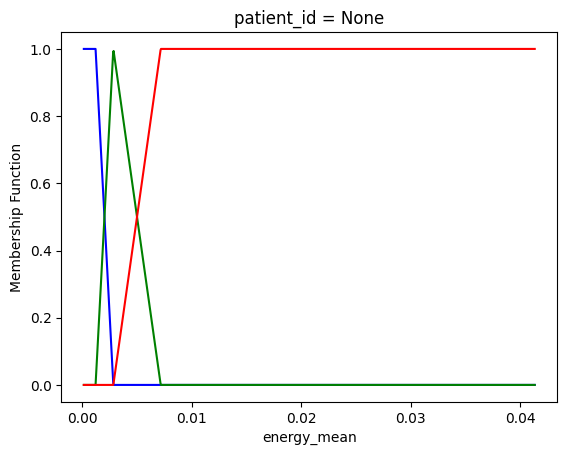

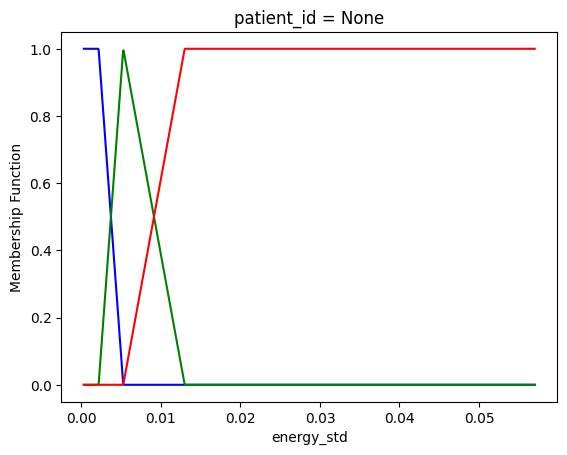

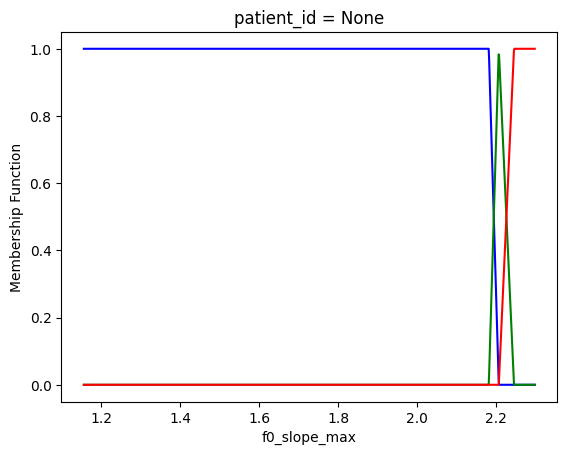

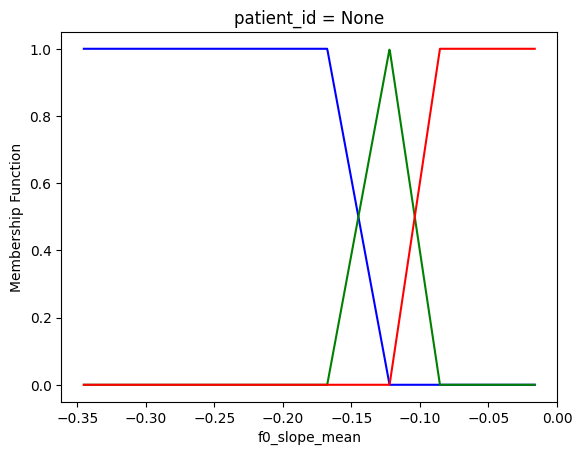

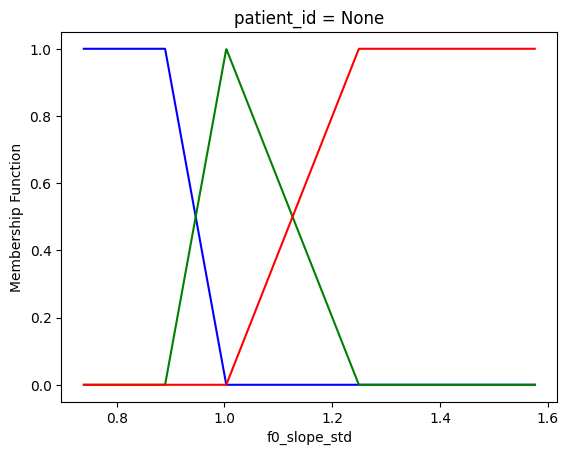

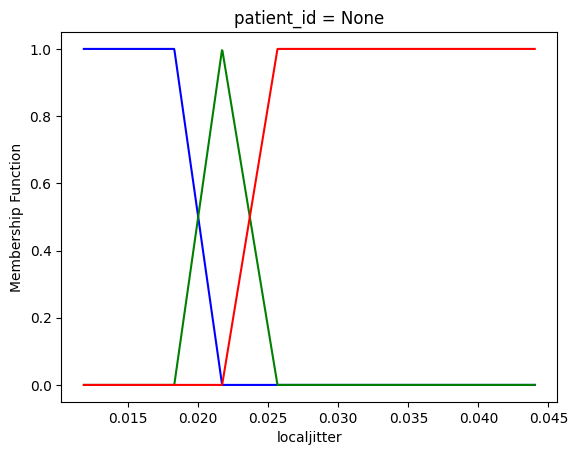

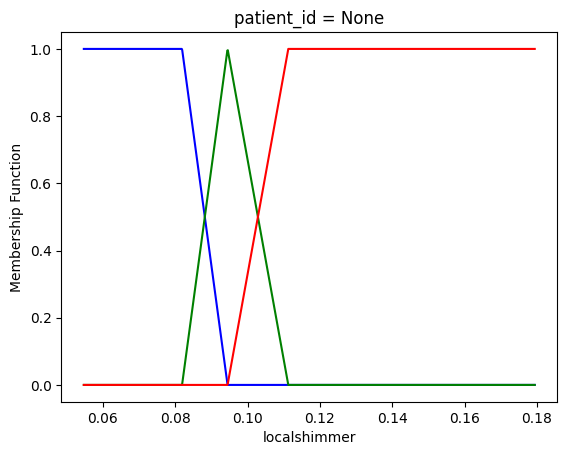

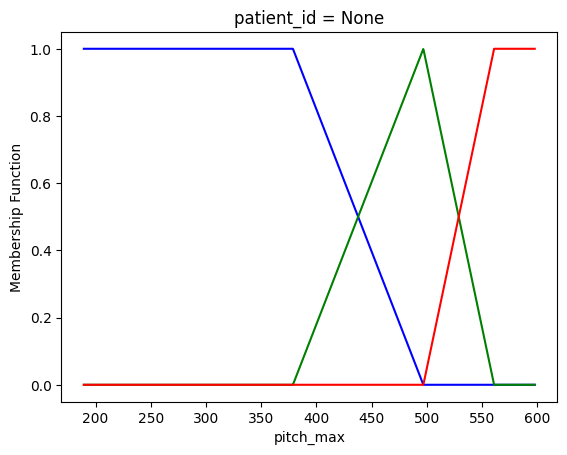

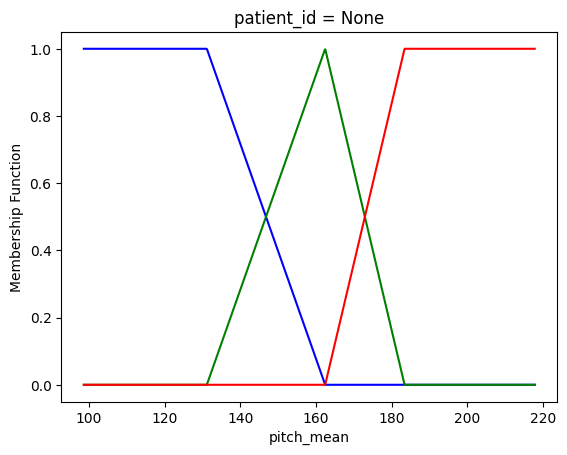

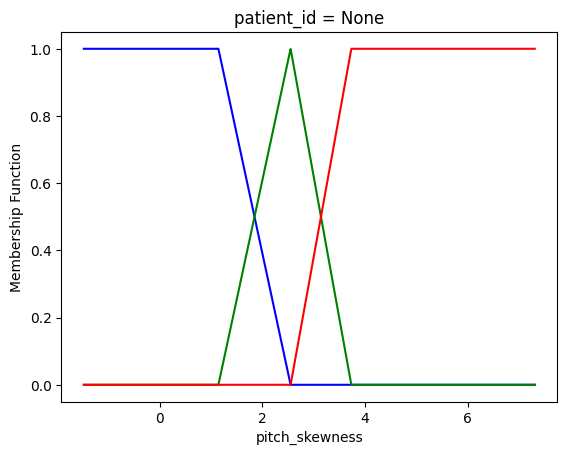

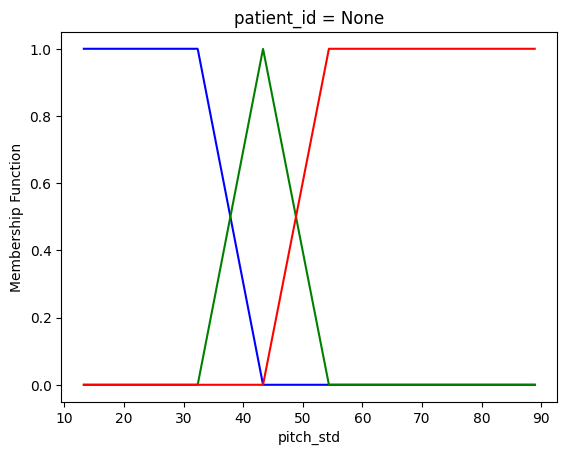

In [30]:
for var in list(moodmon_final.columns[3:]):
  def_ling_var(var)

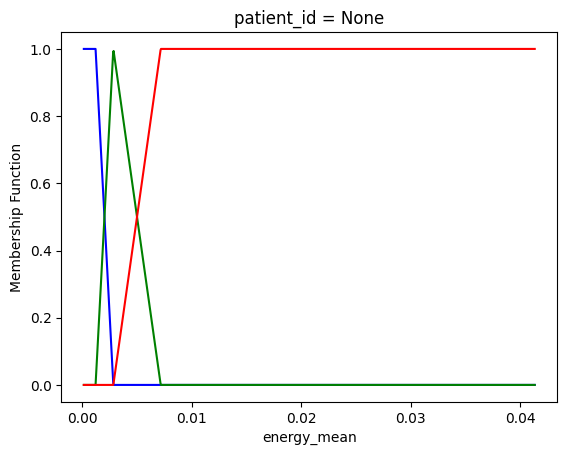

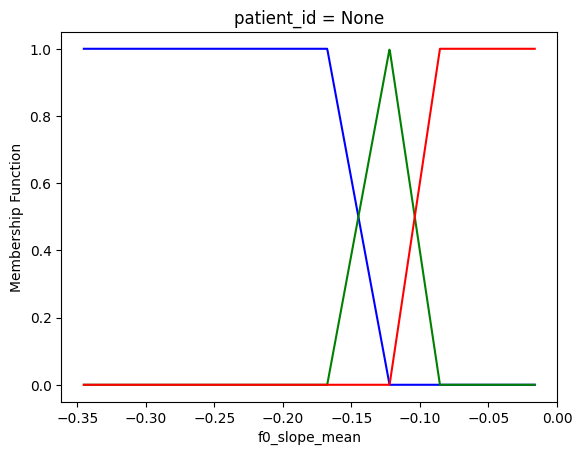

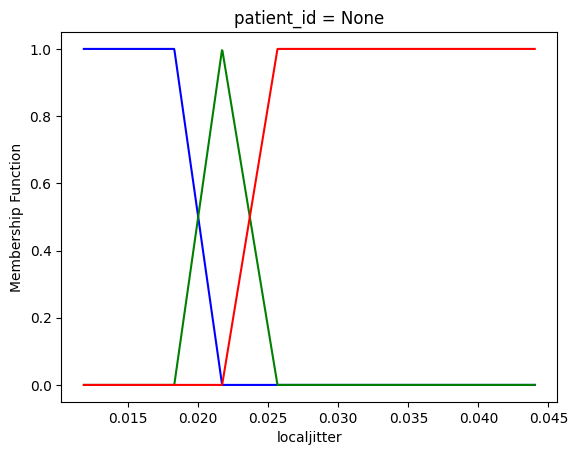

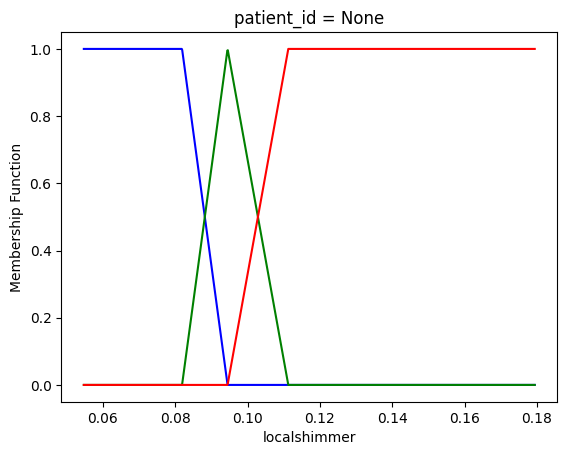

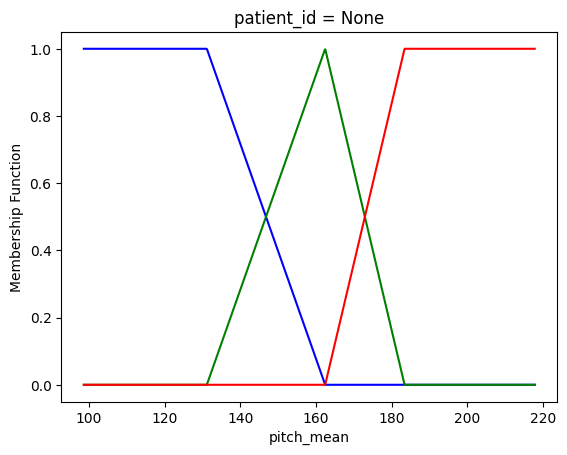

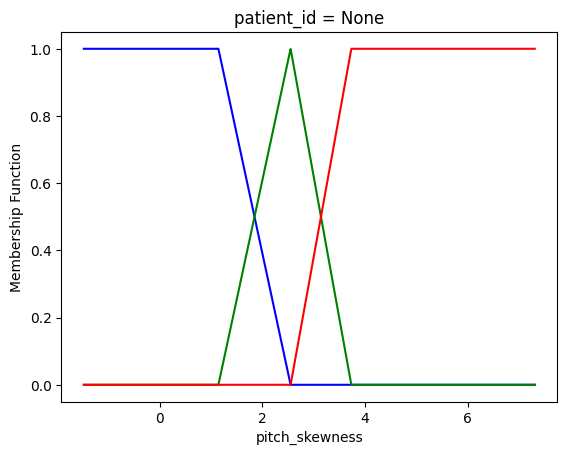

In [31]:
#For selected variables (mean values)
for var in ['energy_mean', 'f0_slope_mean', 'localjitter', 'localshimmer', 'pitch_mean', 'pitch_skewness']:
    def_ling_var(var)


In [32]:
y = moodmon_final.loc[:,'state']
X = moodmon_final.drop(['state'], axis=1)

# Calculating memberships

In [33]:
def membership_function(data, var_name, value, central=0, spread=0.1, plot=False, na_omit=False,
           expert = False,use_central_and_spread=False):
    d = deepcopy(data)

    if na_omit:
        d = d.loc[~d[var_name].isna()]
    else:
        d = d.fillna(0)

    d = d[var_name]

    max_for_universe = np.max(d)
    min_for_universe = np.min(d)

    universe = np.arange(min_for_universe, max_for_universe, 0.001)

    reg_name = var_name

    reg = ctrl.Consequent(universe, reg_name)

    if use_central_and_spread:
        first_quartile = np.max([0,min_for_universe])
        median_quartile = 0.1
        third_quartile = np.min([0.2,max_for_universe])
    else:
        first_quartile = np.percentile(d, 25)
        median_quartile = np.percentile(d, 50)
        third_quartile = np.percentile(d, 75)

    low = fuzz.trapmf(reg.universe, [min_for_universe, min_for_universe, first_quartile, third_quartile])
    medium = fuzz.trimf(reg.universe, [first_quartile, median_quartile, third_quartile])
    high = fuzz.trapmf(reg.universe, [first_quartile, third_quartile, max_for_universe, max_for_universe])

    if plot:
        fig, (ax0) = plt.subplots(nrows=1, figsize=(3, 3))
        ax0.plot(universe, low, 'b', linewidth=2, label='low')
        ax0.plot(universe, medium, 'r', linewidth=2, label='medium')
        ax0.plot(universe, high, 'g', linewidth=2, label='high')
        ax0.set_title(str(var_name))
        ax0.legend()
        plt.tight_layout()
        plt.close()

    return (fuzz.interp_membership(universe, low, value),
            fuzz.interp_membership(universe, medium, value),
            fuzz.interp_membership(universe, high, value)
            )


In [34]:
# example of calculating membership
membership_function(moodmon_final, "energy_mean",moodmon_final.loc[1,'energy_mean'], central=0, spread=0.1, plot=False, na_omit=False,
           expert = False,use_central_and_spread=False)

(0.9465746747170797, 0.19612823289745684, 0.053425325282920336)

In [35]:
membership_function(moodmon_final, "energy_mean",moodmon_final.loc[:,'energy_mean'], central=0, spread=0.1, plot=False, na_omit=False,
           expert = False,use_central_and_spread=False)

(array([0.93738591, 0.94657467, 0.82418922, ..., 1.        , 1.        ,
        1.        ]),
 array([0.22986085, 0.19612823, 0.61449723, ..., 0.        , 0.        ,
        0.        ]),
 array([0.06261409, 0.05342533, 0.17581078, ..., 0.        , 0.        ,
        0.        ]))

In [42]:
energy_ling = membership_function(moodmon_final, "energy_mean",moodmon_final.loc[0:,'energy_mean'], central=0, spread=0.1, plot=False, na_omit=False,
           expert = False,use_central_and_spread=False)

energy_ling_df = pd.DataFrame({'energy_low': energy_ling[0], 'energy_medium': energy_ling[1], 'energy_high': energy_ling[2]})
energy_ling_df.shape

energy_ling_df.reset_index(drop=True, inplace=True)
moodmon_final.reset_index(drop=True, inplace=True)

combined_data = pd.concat([moodmon_final['energy_mean'], energy_ling_df], axis=1)
combined_data 

,energy_mean,energy_low,energy_medium,energy_high
0,0.001564,0.937386,0.229861,0.062614
1,0.001505,0.946575,0.196128,0.053425
2,0.002280,0.824189,0.614497,0.175811
3,0.000857,1.000000,0.000000,0.000000
4,0.001176,0.997790,0.008114,0.002210
...,...,...,...,...
1862,0.006474,0.118710,0.163153,0.881290
1863,0.000707,1.000000,0.000000,0.000000
1864,0.000993,1.000000,0.000000,0.000000
1865,0.000483,1.000000,0.000000,0.000000


In [43]:
# We are adding memberships for other variables: f0_slope_mean, localjitter, localshimmer, pitch_skewness, pitch_mean
f0_slope_ling = membership_function(moodmon_final, "f0_slope_mean",moodmon_final.loc[0:,'f0_slope_mean'], central=0, spread=0.1, plot=False, na_omit=False,
           expert = False,use_central_and_spread=False)

f0_slope_ling_df = pd.DataFrame({'f0_slope_mean_low': f0_slope_ling[0], 'f0_slope_mean_medium': f0_slope_ling[1], 'f0_slope_mean_high': f0_slope_ling[2]})

f0_slope_ling_df.reset_index(drop=True, inplace=True)

#localjitter
localjitter_ling = membership_function(moodmon_final, "localjitter",moodmon_final.loc[0:,'localjitter'], central=0, spread=0.1, plot=False, na_omit=False,
           expert = False,use_central_and_spread=False)

localjitter_ling_df = pd.DataFrame({'localjitter_low': localjitter_ling[0], 'localjittern_medium': localjitter_ling[1], 'localjitter_high': localjitter_ling[2]})

localjitter_ling_df.reset_index(drop=True, inplace=True)

#localshimmer
localshimmer_ling = membership_function(moodmon_final, "localshimmer",moodmon_final.loc[0:,'localshimmer'], central=0, spread=0.1, plot=False, na_omit=False,
           expert = False,use_central_and_spread=False)

localshimmer_ling_df = pd.DataFrame({'localshimmer_low': localshimmer_ling[0], 'localshimmer_medium': localshimmer_ling[1], 'localshimmer_high': localshimmer_ling[2]})

localshimmer_ling_df.reset_index(drop=True, inplace=True)

#pitch_skewness
pitch_skewness_ling = membership_function(moodmon_final, "pitch_skewness",moodmon_final.loc[0:,'pitch_skewness'], central=0, spread=0.1, plot=False, na_omit=False,
           expert = False,use_central_and_spread=False)

pitch_skewness_ling_df = pd.DataFrame({'pitch_skewness_low': pitch_skewness_ling[0], 'pitch_skewness_medium': pitch_skewness_ling[1], 'pitch_skewness_high': pitch_skewness_ling[2]})

pitch_skewness_ling_df.reset_index(drop=True, inplace=True)

#pitch_std
pitch_std_ling = membership_function(moodmon_final, "pitch_mean",moodmon_final.loc[0:,'pitch_mean'], central=0, spread=0.1, plot=False, na_omit=False,
           expert = False,use_central_and_spread=False)

pitch_std_ling_df = pd.DataFrame({'pitch_mean_low': pitch_std_ling[0], 'pitch_mean_medium': pitch_std_ling[1], 'pitch_mean_high': pitch_std_ling[2]})

pitch_std_ling_df.reset_index(drop=True, inplace=True)

combined_data = pd.concat([moodmon_final, energy_ling_df, f0_slope_ling_df, localjitter_ling_df, localshimmer_ling_df, pitch_skewness_ling_df,pitch_std_ling_df], axis=1)
combined_data


,id,state,energy_max,energy_mean,energy_std,f0_slope_max,f0_slope_mean,f0_slope_std,localjitter,localshimmer,...,localjitter_high,localshimmer_low,localshimmer_medium,localshimmer_high,pitch_skewness_low,pitch_skewness_medium,pitch_skewness_high,pitch_mean_low,pitch_mean_medium,pitch_mean_high
0,4,0,0.023317,0.001564,0.002026,2.181225,-0.062739,0.810861,0.027916,0.108872,...,1.000000,0.079763,0.139634,0.920237,0.426238,0.933022,0.573762,0.000000,0.000000,1.000000
1,4,0,0.040986,0.001505,0.002349,2.174885,-0.083719,0.881470,0.028252,0.116089,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.151424,0.377133,0.848576
2,4,0,0.025966,0.002280,0.002530,2.058809,-0.106234,0.882153,0.025954,0.099156,...,1.000000,0.410865,0.719262,0.589135,0.687218,0.575852,0.312782,0.055799,0.138972,0.944201
3,4,0,0.025848,0.000857,0.001213,2.131391,-0.097402,0.861998,0.028116,0.102253,...,1.000000,0.305314,0.534484,0.694686,1.000000,0.000000,0.000000,0.020651,0.051433,0.979349
4,4,0,0.010446,0.001176,0.001331,2.232191,-0.108463,0.906716,0.033433,0.119941,...,1.000000,0.000000,0.000000,1.000000,0.397886,0.870960,0.602114,0.249765,0.622057,0.750235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1862,170,3,0.177588,0.006474,0.013952,2.206525,-0.190349,1.340838,0.026667,0.110097,...,1.000000,0.038031,0.066578,0.961969,0.079650,0.174353,0.920350,1.000000,0.000000,0.000000
1863,172,3,0.015590,0.000707,0.001207,2.168594,-0.051204,0.818707,0.024078,0.096595,...,0.785541,0.498111,0.871994,0.501889,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
1864,172,3,0.020099,0.000993,0.001743,2.245114,-0.114034,0.915308,0.024892,0.105615,...,0.894627,0.190751,0.333929,0.809249,0.366857,0.803038,0.633143,0.074811,0.186323,0.925189
1865,172,3,0.009998,0.000483,0.000798,2.193821,-0.152319,0.860063,0.022293,0.090789,...,0.543320,0.695969,0.709081,0.304031,0.027478,0.060148,0.972522,0.000000,0.000000,1.000000


# Functions to generate short and extended linguistic summaries

## *generate_short_linguistic_summaries* (LS1)

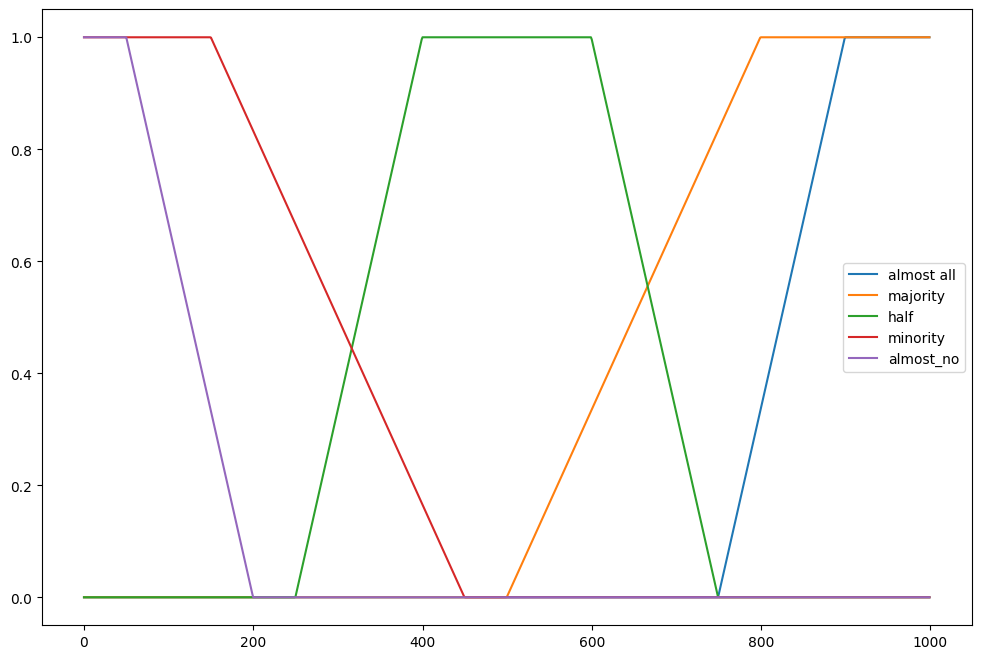

In [44]:
def words(word):
  x = np.linspace(0, 1, 1000)
  if word=='almost_all':
    return(fuzz.trapmf(x, [0.75,0.9,1,1]))
  if word=='majority':
    return(fuzz.trapmf(x, [0.5,0.8, 1,1]))
  if word=='half':
    return(fuzz.trapmf(x, [0.25,0.40, 0.60,0.75]))
  if word=='minority':
    return(fuzz.trapmf(x, [-1, 0, 0.15,0.45]))
  if word=='almost_no':
    return(fuzz.trapmf(x, [-1, 0, 0.05,0.2]))

plt.figure(figsize=(12,8))
plt.plot(words('almost_all'),label='almost all')
plt.plot(words('majority'),label='majority')
plt.plot(words('half'),label='half')
plt.plot(words('minority'),label='minority')
plt.plot(words('almost_no'),label='almost_no')
plt.legend(loc ="center right")
plt.show()

In [46]:
def membership(fuzzy_number, value, dataframe):
  d=deepcopy(dataframe)
  max_for_universe = 1
  min_for_universe = 0
  universe = np.arange(min_for_universe, max_for_universe,0.001)
  return(fuzz.interp_membership(universe, fuzzy_number, value))

In [47]:
def generate_short_linguistic_summaries(word,dataframe,var_level,state):
  result_df = pd.DataFrame(columns=['Descr', 'Degree of Truth', 'Degree of Support'])

  d = deepcopy(dataframe)
  word1 = None
  if word == 'almost_all':
    word1 = words('almost_all')
  elif word == 'majority':
    word1 = words('majority')
  elif word == 'half':
    word1 = words('half')
  elif word == 'minority':
    word1 = words('minority')
  elif word == 'almost_no':
    word1 = words('almost_no')
  if state != 'all':
            d = d[d['state'] == state]
  degree_of_truth= membership(word1,(np.mean(d[var_level])),d[var_level])
  degree_of_support=  sum(d[var_level] > 0) / len(d)
  if state=='all':
    tresc = f'For {word} patients (all states) we have {var_level}'
  else:
    tresc = f'For {word} patients in state {state} we have {var_level}'

  result_df = pd.concat([result_df, pd.DataFrame({'Descr': [tresc],
                                  'Degree of Truth': [degree_of_truth],
                                  'Degree of Support': [degree_of_support]})], ignore_index=True)

  return result_df

In [50]:
# examplary summaries

print(membership(words('majority'), 1298,combined_data['localshimmer_high']))
print(generate_short_linguistic_summaries('majority',combined_data,'localshimmer_high','all'))


0.0
                                               Descr  Degree of Truth  \
0  For majority patients (all states) we have loc...              0.0   

   Degree of Support  
0           0.750937  


C:\Users\user\AppData\Local\Temp\ipykernel_22884\567930026.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, pd.DataFrame({'Descr': [tresc],


## *generate_extended_linguistic_summaries* (LS2)

In [51]:
def generate_extended_linguistic_summaries(word, dataframe, var_level1, var_level2, state, norm):

    result_df = pd.DataFrame(columns=['Descr', 'Degree of Truth', 'Degree of Support', 'Degree of Focus'])

    d = deepcopy(dataframe)

    if word == 'almost_all':
        word1 = words('almost_all')
    elif word == 'majority':
        word1 = words('majority')
    elif word == 'half':
        word1 = words('half')
    elif word == 'minority':
        word1 = words('minority')
    elif word == 'almost_no':
        word1 = words('almost_no')

    if state != 'all':
        d = d[d['state'] == state]

    if norm == 'min':
        mins = pd.concat([d[var_level1], d[var_level2]], axis=1).min(axis=1)
    elif norm == 'product':
        mins = pd.concat([d[var_level1], d[var_level2]], axis=1).apply(np.prod, axis=1)
    elif norm == 't_norm':
        mins = pd.concat([d[var_level1], d[var_level2]], axis=1).apply(lambda row: np.fmin(row[var_level1], row[var_level2]), axis=1)

    degree_of_truth = membership(word1, (np.sum(mins)) / (np.sum(d[var_level1])), d[var_level1])
    degree_of_support =   sum(mins>0) /len(d[var_level1])
    degree_of_focus = sum(d[var_level2]) / len(d[var_level2])

    if state=='all':
      tresc = f'For {word} patients (all states) with {var_level1} we have {var_level2}'
    else:
      tresc = f'For {word} patients in state {state} with {var_level1} we have {var_level2}'

    result_df = pd.concat([result_df, pd.DataFrame({'Descr': [tresc],
                                  'Degree of Truth': [degree_of_truth],
                                  'Degree of Support': [degree_of_support],
                                  'Degree of Focus': [degree_of_focus]})], ignore_index=True)

    return result_df


In [54]:
# examples of extended summaries
print(generate_extended_linguistic_summaries('majority',combined_data,'localjitter_high','pitch_skewness_high','all',norm='min'))

                                               Descr  Degree of Truth  \
0  For majority patients (all states) with localj...          0.23864   

   Degree of Support  Degree of Focus  
0           0.599357         0.511512  


C:\Users\user\AppData\Local\Temp\ipykernel_22884\3983245613.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, pd.DataFrame({'Descr': [tresc],


# Generations of summaries


In [ ]:
print(generate_extended_linguistic_summaries('almost_no',combined_data,'localshimmer_high','pitch_skewness_high',0,norm='product'))
print(generate_extended_linguistic_summaries('minority',combined_data,'localshimmer_high','pitch_skewness_high',0,norm='product'))
print(generate_extended_linguistic_summaries('half',combined_data,'localshimmer_high','pitch_skewness_high',0,norm='product'))
print(generate_extended_linguistic_summaries('majority',combined_data,'localshimmer_high','pitch_skewness_high',0,norm='product'))
print(generate_extended_linguistic_summaries('almost_all',combined_data,'localshimmer_high','pitch_skewness_high',0,norm='product'))

                                  Tresc podsumowania  Degree of Truth  \
0  For almost_no patients in state 0 with localsh...              0.0   

   Degree of Support  Degree of Focus  
0           0.553746         0.470361  
                                  Tresc podsumowania  Degree of Truth  \
0  For minority patients in state 0 with localshi...              0.0   

   Degree of Support  Degree of Focus  
0           0.553746         0.470361  
                                  Tresc podsumowania  Degree of Truth  \
0  For half patients in state 0 with localshimmer...              1.0   

   Degree of Support  Degree of Focus  
0           0.553746         0.470361  
                                  Tresc podsumowania  Degree of Truth  \
0  For majority patients in state 0 with localshi...              0.0   

   Degree of Support  Degree of Focus  
0           0.553746         0.470361  
                                  Tresc podsumowania  Degree of Truth  \
0  For almost_all p

In [56]:
words1 = ["almost_all", "majority", "half", "minority", "almost_no"]
variables = ["energy_high", "energy_medium","energy_low","f0_slope_mean_high", "f0_slope_mean_medium","f0_slope_mean_low",
             "localjitter_high", "localjittern_medium","localjitter_low","localshimmer_high", "localshimmer_medium","localshimmer_low",
             "pitch_skewness_high", "pitch_skewness_medium","pitch_skewness_low","pitch_mean_high","pitch_mean_medium","pitch_mean_low"]
states = [0, 1, 2, "all"]
norm = ["product","min","t_norm"]

## All possible LSs

In [ ]:
combinations = list(product(variables, states, words1)) #wszystkie możliwe kombinacje

output_short = []
for combination in combinations:
  variable, state, word = combination
  output_short.append(generate_short_linguistic_summaries(word, combined_data, variable, state))

result_ls1 = pd.concat(output_short, ignore_index=True)

In [58]:
result_ls1

,Descr,Degree of Truth,Degree of Support
0,For almost_all patients in state 0 we have ene...,0.000000,0.874593
1,For majority patients in state 0 we have energ...,0.083349,0.874593
2,For half patients in state 0 we have energy_high,1.000000,0.874593
3,For minority patients in state 0 we have energ...,0.000000,0.874593
4,For almost_no patients in state 0 we have ener...,0.000000,0.874593
...,...,...,...
355,For almost_all patients (all states) we have p...,0.000000,0.749866
356,For majority patients (all states) we have pit...,0.000000,0.749866
357,For half patients (all states) we have pitch_m...,1.000000,0.749866
358,For minority patients (all states) we have pit...,0.000000,0.749866


In [59]:
result_ls1[(result_ls1['Degree of Truth'] < 0.4) & (result_ls1['Degree of Support'] < 0.4)]


,Descr,Degree of Truth,Degree of Support
30,For almost_all patients in state 2 we have ene...,0.000000,0.389474
31,For majority patients in state 2 we have energ...,0.000000,0.389474
32,For half patients in state 2 we have energy_me...,0.000000,0.389474
34,For almost_no patients in state 2 we have ener...,0.116480,0.389474
90,For almost_all patients in state 2 we have f0_...,0.000000,0.378947
91,For majority patients in state 2 we have f0_sl...,0.000000,0.378947
92,For half patients in state 2 we have f0_slope_...,0.000000,0.378947
94,For almost_no patients in state 2 we have f0_s...,0.204675,0.378947


In [64]:
rows_50_dot = result_ls1.sort_values("Degree of Truth", ascending=False)[0:50].index #selecting top 50
result_ls1_selected = result_ls1.loc[rows_50_dot] #z początkowej ramki wybieramy indeksy z albo jednego albo drugiego wektora indeksów

In [65]:
result_ls1_selected

,Descr,Degree of Truth,Degree of Support
167,For half patients in state 1 we have localjitt...,1.000000,0.748588
117,For half patients (all states) we have f0_slop...,1.000000,0.750937
52,For half patients in state 2 we have energy_low,1.000000,0.631579
342,For half patients in state 0 we have pitch_mea...,1.000000,0.736156
237,For half patients (all states) we have localsh...,1.000000,0.754687
227,For half patients in state 1 we have localshim...,1.000000,0.742938
62,For half patients in state 0 we have f0_slope_...,1.000000,0.760586
297,For half patients (all states) we have pitch_s...,1.000000,0.750402
122,For half patients in state 0 we have localjitt...,1.000000,0.768730
282,For half patients in state 0 we have pitch_ske...,1.000000,0.807818


In [67]:
#check the summaries with small support
result_ls1_selected[(result_ls1_selected['Degree of Support'] < 0.4)]

,Descr,Degree of Truth,Degree of Support
93,For minority patients in state 2 we have f0_sl...,0.935671,0.378947
33,For minority patients in state 2 we have energ...,0.891573,0.389474


In [69]:
#write to csv

result_ls1_selected.to_csv('output_ls1.csv', index=False)


## Podsumowania LS2

In [71]:
#generate combinations of extended LSs

combinations = list(product(variables, states, variables, words1)) 

output_extended = []
for combination in combinations:
  variable1, state, variable2, word = combination
  if variable1 == variable2:
      continue
  output_extended.append(generate_extended_linguistic_summaries(word, combined_data, variable1, variable2, state, norm='product'))

result_ls2 = pd.concat(output_extended, ignore_index=True)

C:\Users\user\AppData\Local\Temp\ipykernel_22884\3983245613.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, pd.DataFrame({'Descr': [tresc],
C:\Users\user\AppData\Local\Temp\ipykernel_22884\3983245613.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, pd.DataFrame({'Descr': [tresc],
C:\Users\user\AppData\Local\Temp\ipykernel_22884\3983245613.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA

In [73]:
result_ls2

,Descr,Degree of Truth,Degree of Support,Degree of Focus
0,For almost_all patients in state 0 with energy...,0.000000,0.615635,0.285326
1,For majority patients in state 0 with energy_h...,0.000000,0.615635,0.285326
2,For half patients in state 0 with energy_high ...,0.000000,0.615635,0.285326
3,For minority patients in state 0 with energy_h...,0.837419,0.615635,0.285326
4,For almost_no patients in state 0 with energy_...,0.008171,0.615635,0.285326
...,...,...,...,...
6115,For almost_all patients (all states) with pitc...,0.000000,0.499732,0.268495
6116,For majority patients (all states) with pitch_...,0.000000,0.499732,0.268495
6117,For half patients (all states) with pitch_mean...,0.000000,0.499732,0.268495
6118,For minority patients (all states) with pitch_...,0.687445,0.499732,0.268495


In [74]:
# checking summaries with smallest DoT and DoS
result_ls2[(result_ls2['Degree of Truth'] < 0.2) & (result_ls2['Degree of Support'] < 0.2)]

,Descr,Degree of Truth,Degree of Support,Degree of Focus
555,For almost_all patients in state 2 with energy...,0.000000,0.189474,0.206717
556,For majority patients in state 2 with energy_m...,0.000000,0.189474,0.206717
557,For half patients in state 2 with energy_mediu...,0.000000,0.189474,0.206717
559,For almost_no patients in state 2 with energy_...,0.182155,0.189474,0.206717
1560,For almost_all patients in state 2 with f0_slo...,0.000000,0.168421,0.185843
1561,For majority patients in state 2 with f0_slope...,0.000000,0.168421,0.185843
1562,For half patients in state 2 with f0_slope_mea...,0.000000,0.168421,0.185843
1564,For almost_no patients in state 2 with f0_slop...,0.000000,0.168421,0.185843
2570,For almost_all patients in state 2 with localj...,0.000000,0.168421,0.169129
2571,For majority patients in state 2 with localjit...,0.000000,0.168421,0.169129


In [75]:
# to csv
result_ls2.to_csv('output_ls2_all.csv', index=False)